# Image Segmentation

What is image segmentation?

Like image detection and localization we first detect the object and then localize the object using the algorithms ..
But now we want some deeper understanding of what is happening in the image. 

Image segmentation creates a pixel-wise mask for each object in the image. This technique gives us a far more granular understanding of the object(s) in the image.

Example for the image -> In cancer cells we want to know the shape of the image. just finding wheather their the cell is present or not doesnot work we need find the shape of the cell . Cause cancer shape cells are quite different.  Here we need granular information for the image and we need to segment out the portions of the images.





 

## Types


Semantic segmentation---->

In sematic segmentation every pixel belongs to a particular class and are represented by same color.

Instance segmentation----->

Different object of same class have different colors.




Different algorithms have been proposed over the years for image segmentation and two important properties commonly employed to categorize various segmentation algorithms are homogeneity and discontinuity of pixel properties. 

Edge-based methods are based on pixel discontinuity properties and they segment images by detecting pixels with rapid transition in intensities between regions. 

The image segmentation methods based on the property of homogeneity include thresholding, clustering, and region growing as well as region splitting and merging. These methods segment images based on the predefined objective functions and characteristics such as texture, shape, color, intensity, and other domain specific features.

##  Image thresholding

In this method we make the image grayscale 
Then we select a threshold value for the image and below the threshold we convert all the pixels to completely black and the above it to completely white.


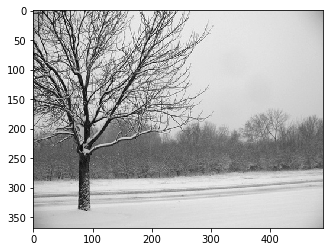

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('snow.jpg',0)
plt.imshow(img,'gray')

Text(0.5, 1.0, 'hello')

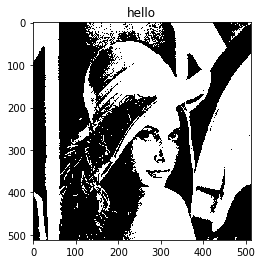

In [2]:


img = cv2.imread('../Lenna.png',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
plt.imshow(thresh1,'gray')
plt.title("hello")
# plt.show()

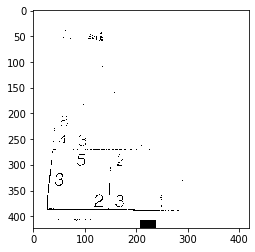

In [3]:
# Adaptive thresholding
'''
We need to adapt to changes in the lights of the images and hence we use the adaptive thresholding method..

This has 2 types mean and gaussian thresholding ..
'''
img = cv2.imread('sudoku.jpg',0)
res1,thresh1 = cv2.threshold(img,20,255,cv2.THRESH_BINARY)
'''
This happened due the fact of change in the lighting conditions in the image.
Now lets us look at adaptive thresholding.
'''
plt.imshow(thresh1,'gray')


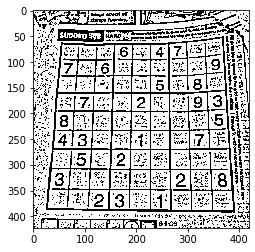

In [4]:
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
plt.imshow(th2,"gray")

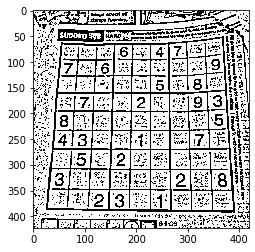

In [5]:
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
plt.imshow(th2,"gray")

## Histogram of an image 

It is used in the case where we want to plot the frequency of each grayscale value of the image 

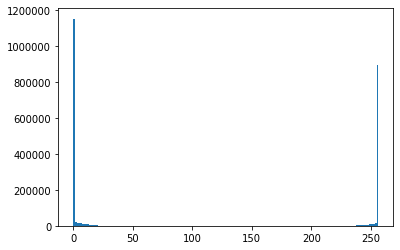

In [6]:

plt.hist(cv2.imread("house.jpg").ravel(),256,[0,256]); plt.show()

In [7]:
# otsu's Algorithm ewxample
img = cv2.imread('house.jpg',0)
blur = cv2.GaussianBlur(img,(5,5),0)

# find normalized_histogram, and its cumulative distribution function
hist = cv2.calcHist([blur],[0],None,[256],[0,256])
hist_norm = hist.ravel()/hist.max()
Q = hist_norm.cumsum()

bins = np.arange(256)

fn_min = np.inf
thresh = -1

for i in range(1,256):
    p1,p2 = np.hsplit(hist_norm,[i]) # probabilities
    q1,q2 = Q[i],Q[255]-Q[i] # cum sum of classes
    b1,b2 = np.hsplit(bins,[i]) # weights

    # finding means and variances
    m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
    v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2

    # calculates the minimization function
    fn = v1*q1 + v2*q2
    if fn < fn_min:
        fn_min = fn
        thresh = i

# find otsu's threshold value with OpenCV function
ret, otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print (thresh,ret)

128 127.0


Otzu's Binarization 

Used to find the exact value of the threshold for the bimodal images .
Otsu’s algorithm tries to find a threshold value (t) which minimizes the weighted within-class variance given by the relation :

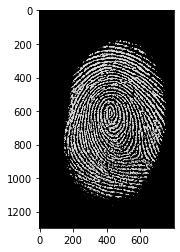

In [8]:
img = cv2.imread("finger.jpg",0)
img = img[:,700:1500]
plt.imshow(img,"gray")

## Edge Based Segmentation


Will Be reading about it in the end.

## Region Based Segmentation
4 types:
1) Region Growing 
2) Region Splitting
3) Region Merging
4) Split And Merge


1) Pixels Follow a certain rules and continue to increase the area till the rule is followed.

2) Spliting also has a rule and then the image gets split into 4 or 2 if the rule is not followed . otherwise the region is considered as whole.

3) Every pixel is a region and then the pixels having same rules are merged together. 

4) Split and Merge -> Combining the 2 and 3 operations.




## Clustering Based Segmentation


Using The Kmeans Clustering Algorithm


In [9]:
from sklearn.cluster import DBSCAN
img = cv2.imread('finger.jpg',0)
final = []
count = 0
for i in range(img.shape[0]):
    clustering = DBSCAN(eps=3, min_samples=2).fit_predict(img[i].reshape(-1,1))
    count += 1
    print(count)
    final.append(clustering)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


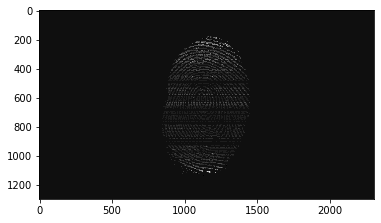

In [10]:
plt.imshow(final,"gray")

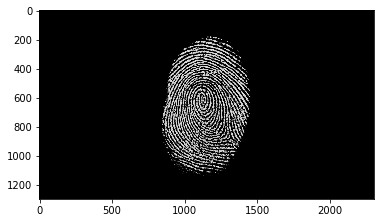

In [11]:
plt.imshow(img,"gray")

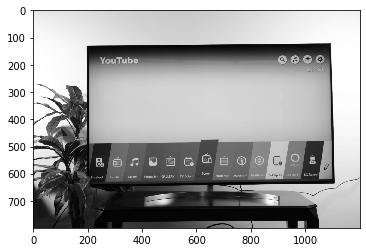

In [64]:
image = cv2.imread('/home/mononoke/Internship/IIIT-A/ImageSegmenatation/tv.jpg',0)
plt.imshow(image,"gray")  

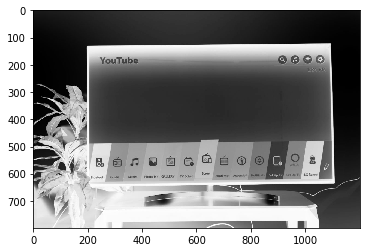

In [65]:
img_not = cv2.bitwise_not(image)
plt.imshow(img_not,"gray")

In [66]:
image = cv2.cvtColor(img_not, cv2.COLOR_BGR2RGB)
# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

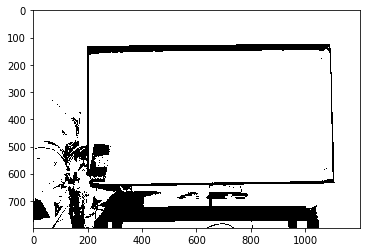

In [67]:
# create a binary thresholded image
_, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)
# show it
plt.imshow(binary, cmap="gray")
plt.show()

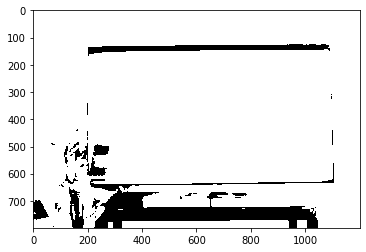

In [73]:
# find the contours from the thresholded image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# draw all contours
image = cv2.drawContours(binary, contours, -1, (255,0, 0), 2)
plt.imshow(image,"gray")
plt.show()


In [81]:
main = image = cv2.imread('/home/mononoke/Internship/IIIT-A/ImageSegmenatation/tv.jpg')
ellipse = cv2.fitEllipse(contours[0])
cv2.ellipse(main,ellipse,(0,255,2)).shape


(799, 1200, 3)